# PROTO LEARN

## 🟢 Session History Data Vis.

,ROC AUC Mean,ROC AUC Std,PR AUC Mean,PR AUC Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1 Score Mean,F1 Score Std,Balanced Accuracy Mean,Balanced Accuracy Std
Model,,,,,,,,,,,,
RandomForest_gini_100_auto,0.942277,0.046101,0.978008,0.0,0.891844,0.068527,0.909905,0.076214,0.897677,0.050408,0.869397,0.063520
RandomForest_entropy_20_log2,0.944193,0.046349,0.987001,0.0,0.899545,0.066754,0.915714,0.086334,0.903958,0.055113,0.878524,0.064745
RandomForest_gini_200_20,0.929934,0.049852,0.907610,0.0,0.873426,0.081317,0.886095,0.099826,0.874597,0.064569,0.842381,0.077892


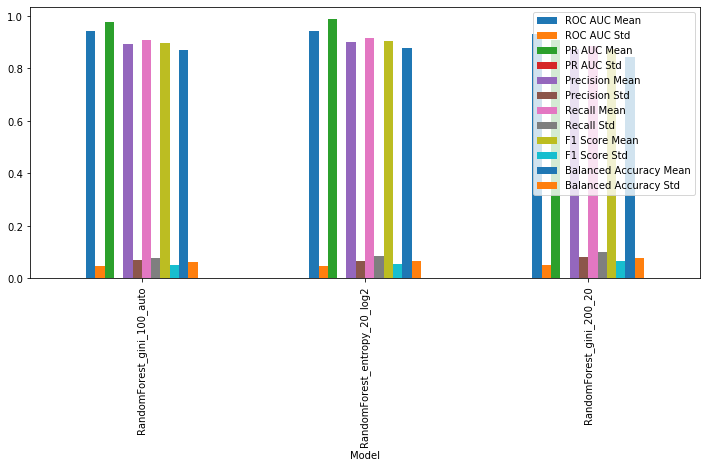

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

# Prepare df
use_cols = ['Specify the classifier', 'Number of estimators', 'Function for measure the quality', 'Number of max. features', 
            'ROC AUC Mean', 'ROC AUC Std', 'PR AUC Mean', 'PR AUC Std', 'Precision Mean', 'Precision Std', 'Recall Mean', 
            'Recall Std', 'F1 Score Mean', 'F1 Score Std', 'Balanced Accuracy Mean', 'Balanced Accuracy Std']
df = pd.read_csv("C://Users//furka//Desktop/RandomForest_session_history.csv", usecols=use_cols)

df["Model"] = df["Specify the classifier"] + "_" + df["Function for measure the quality"] + "_" + \
                df["Number of estimators"].astype(str) + "_" + df["Number of max. features"].astype(str)
df = df.drop(['Specify the classifier', 'Number of estimators', 'Function for measure the quality', 'Number of max. features'], axis=1)
df = df.set_index("Model")

# Basic Graph
df.plot(kind="bar", figsize=(12,5))

# Show df
df

# Plotly Graphs

In [62]:
res = []
for col in df.columns:
    res.append(
        go.Bar(
            x=df.index.values.tolist(),
            y=df[col].values.tolist(),
            name=col,
            hoverinfo='name+y'
        )
    )

layout = go.Layout(barmode='group', title="Comparison of hyperparameters for RandomForest")
fig = go.Figure(data=res, layout=layout)
fig.show()

In [63]:
df_t = df.T
res = []
for col in df_t.columns:
    res.append(
        go.Bar(
            x=df_t.index.values.tolist(),
            y=df_t[col].values.tolist(),
            name=col,
            hoverinfo='name+y'
        )
    )

layout = go.Layout(barmode='group', title="Comparison of hyperparameters for RandomForest")
fig = go.Figure(data=res, layout=layout)
fig.show()

# Plotly Graphs with Error Bar for `std`

In [91]:
mean_columns = [_ for _ in df.columns if "Mean" in _]
mean_values = df[mean_columns]
std_columns = [_ for _ in df.columns if "Std" in _]
std_values = df[std_columns]

res = []
for col, col2 in zip(mean_columns, std_columns):
    res.append(
        go.Bar(
            x=df.index.values.tolist(),
            y=mean_values[col].values.tolist(),
            name=col,
            hoverinfo='name+y',
            error_y=dict(type='data', array=std_values[col2].values.tolist()),
        )
    )

layout = go.Layout(barmode='group', title="Comparison of hyperparameters for RandomForest")
fig = go.Figure(data=res, layout=layout)
fig.show()

In [70]:
df_t = df.T
mean_columns = [_ for _ in df_t.index if "Mean" in _]
mean_values = df_t[df_t.index.isin(mean_columns)]
std_columns = [_ for _ in df_t.index if "Std" in _]
std_values = df_t[df_t.index.isin(std_columns)]

res = []
for col in df_t.columns:
    res.append(
        go.Bar(
            x=mean_columns,
            y=mean_values[col].values.tolist(),
            name=col,
            hoverinfo='name+y',
            error_y=dict(type='data', array=std_values[col].values.tolist()),
        )
    )

layout = go.Layout(barmode='group', title="Comparison of hyperparameters for RandomForest")
fig = go.Figure(data=res, layout=layout)
fig.show()